In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from collections import Counter
from pandas.plotting import table

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
NewBase = automap_base()
# reflect the tables
NewBase.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
NewBase.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = NewBase.classes.measurement
Station = NewBase.classes.station

In [9]:
# Create our session (link) from Python to the DB
oursession = Session(engine)


In [10]:
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

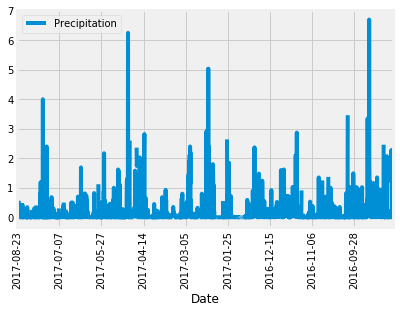

In [13]:
# Calculate the date 1 year ago from the last data point in the database
cubsworldseries = dt.date(2016, 8, 31) - dt.timedelta(days=365)

# Design a query to retrieve the last 12 months of precipitation data and plot the results
measurement_12 = oursession.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= cubsworldseries).order_by(Measurement.date.desc()).all()

#Perform a query to retrieve the data and precipitation scores
dataf = pd.DataFrame(measurement_12[:2230], columns=['Date', 'Precipitation'])
dataf.set_index('Date', inplace=True )

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
sortprecip = dataf.sort_values(by='Date', ascending=False)
sortprecip.head(10)

# Use Pandas Plotting with Matplotlib to plot the data
# I turned the data in the x-axis it didnt pull up at all 
sortprecip.plot(rot=90)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sortprecip.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
availablestations = oursession.query(Measurement,Station).filter(Measurement.station == Station.station).all() 
station_count = []
for station in availablestations:
    (mt,st) = station
    station_count.append(st.station)

    
len(set(station_count))

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Counter(station_count, descending = True)

Counter({'USC00519397': 2724,
         'USC00513117': 2709,
         'USC00514830': 2202,
         'USC00517948': 1372,
         'USC00518838': 511,
         'USC00519523': 2669,
         'USC00519281': 2772,
         'USC00511918': 1979,
         'USC00516128': 2612,
         'descending': 1})

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
stationquery = oursession.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)). filter(Measurement.station == 'USC00519281').all()

stationquery

[(54.0, 85.0, 71.66378066378067)]

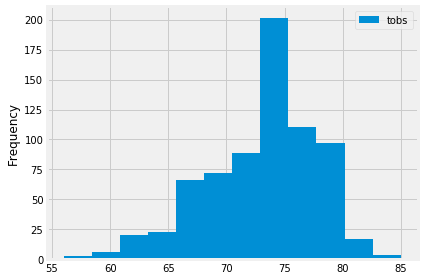

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cubsworldseries = dt.date(2016, 8, 31) - dt.timedelta(days=365)
results = oursession.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= cubsworldseries).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()